<a href="https://colab.research.google.com/github/aswath-r/AIRBNB_Booking_Analysis/blob/main/Aswath_AIRBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# To Import and explore the dataset available in AIRBNB Booking Analysis.

In [ ]:
df_airbnb = pd.read_csv('/content/drive/MyDrive/Data_Science/Capstone_Projects/AIRBNB/Airbnb NYC 2019.csv') # To import the CSV File
df_airbnb.head(5) # To display the first 5 rows and check the data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
print("The shape of the AIRBNB Booking Analysis is : ",df_airbnb.shape) # Shape of the dataframe

The shape of the AIRBNB Booking Analysis is :  (48895, 16)


In [ ]:
df_airbnb.info() # To display the details of the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

12 last_review is object datatype, it needs to be converted to date

In [ ]:
df_airbnb['last_review'] = pd.to_datetime(df_airbnb.last_review) # 'last_review column has been changed to datetime datatype

In [ ]:
# To check for duplicate entries, we will check with column 'ID' , As ID will be unique
duplicate_df = df_airbnb[df_airbnb.duplicated('id')]
print(duplicate_df)  # As it returns empty Dataframe, values present in the dataset are unique

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [ ]:
# To check for missing data
count = df_airbnb.isnull().sum()        # null values in each column will be counted
percent = df_airbnb.isnull().mean().round(4)*100  # The percentage of null value 
missing_data = pd.concat([count,percent],axis = 1,keys=['Total', 'Percent']).round(2)  # To create a pivot table
missing_data   # returns the missing value details

,Total,Percent
id,0,0.00
name,16,0.03
host_id,0,0.00
host_name,21,0.04
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00
room_type,0,0.00
price,0,0.00


In the dataset, last review and reviews_per_month column has more missing values, so we will drop those columns, we will try to determine the missing names and host_name from the existing data

In [ ]:
# New dataframe for Airbnb is to be created by removing the column 'last_review' and 'reviews_per_month'
df_modified = df_airbnb.drop(['last_review','reviews_per_month'], axis = 1)
missing_name = df_modified[df_modified['name'].isnull()] # To filter dataset with null values
missing_host_id = list(missing_name['host_id']) # To list the host ids which has null values in name column
missing_host_id

[6676776,
 11395220,
 20700823,
 22686810,
 21600904,
 1832442,
 24625694,
 31147528,
 33377685,
 50448556,
 37306329,
 49522403,
 69715276,
 71552588,
 85288337,
 49662398]

In [ ]:
# To determine the missing values, we filtered the hostid of previous data
new_names = df_airbnb[df_airbnb['host_id'].isin(missing_host_id)]  # To check missing host ids present in the past data
new_names = new_names[new_names['name'].notnull()] # to filter the data with non null values
new_names.drop_duplicates('host_id') 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12827,9788141,Bedroom in UWS,50448556,Miguel,Manhattan,Harlem,40.80518,-73.95099,Private room,100,1,1,2015-12-03,0.02,5,0
15820,12797920,Large Bedroom near Subway,69715276,Yan,Manhattan,Upper West Side,40.79806,-73.96167,Private room,100,1,1,2016-07-31,0.03,2,0


we can able to determine the 2 missing values of name column from the past data. by these the missing values of 'name' can be reduced from 16 to 14.\





# 1_correlation analysis on different features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febe58dce10>,
      dtype=object)

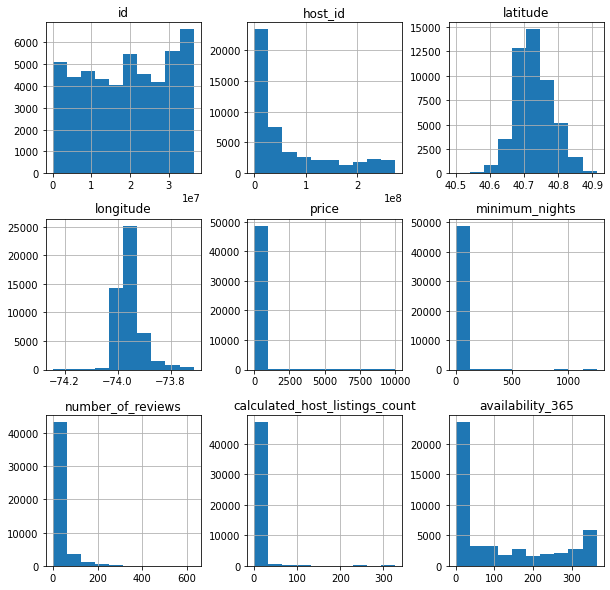

In [ ]:
# Correlation analysis helps us to see features relatations
df=df_modified # To rename the dataframe , for simplicity
df.hist(figsize = (10,10))

from the correlation, we can understand that
*   Latitude and longitude has normal distribution
*   price - most of the room price is lessthan 2000
*   minimum nights - most of the host offer minimum nights to book the hotel is lessthan 365 days
*   availablity - most of the hotels are not available throughout the year

# 2_ To determine the count of neighbourhood group

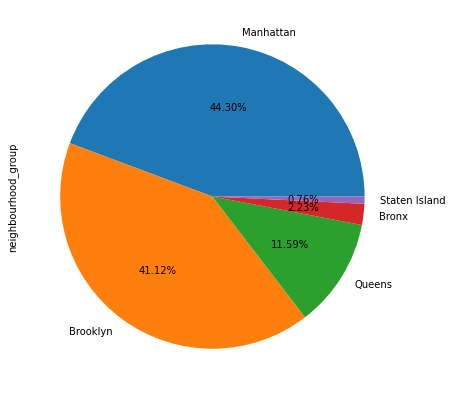

In [ ]:
# To determine the count of neighbourhood group
neighbourhood_group = df['neighbourhood_group'].value_counts()  # To count the neighbourhood group
neighbourhood_group.plot(kind = 'pie',figsize =(7,7),autopct='%1.2f%%')



*   From the given dataset,it is found that most of the rooms are available at manhattan



# 3_To determine most popular neighbourhood

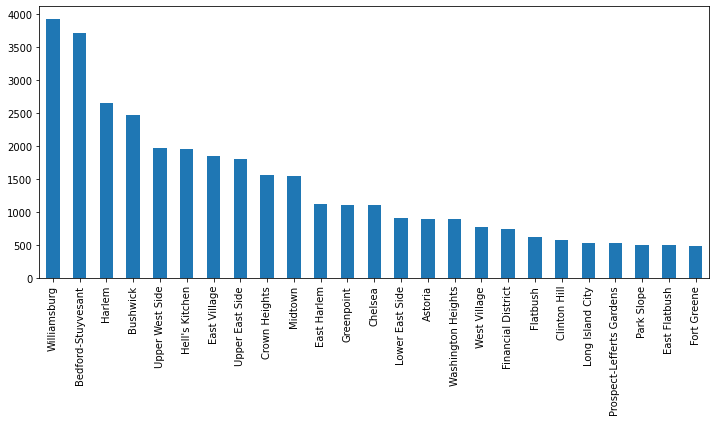

In [ ]:
neighbourhood = df['neighbourhood'].value_counts().sort_values(ascending=False)[0:25] # To filter first 25 popular neighbourhood
neighbourhood.plot(kind='bar',figsize=(12,5)) 
# sns.countplot(neighbourhood)

*   From the given dataset, it is found that williamsburg is the most popular neighbour.

# 4_ To determine the most busiest host

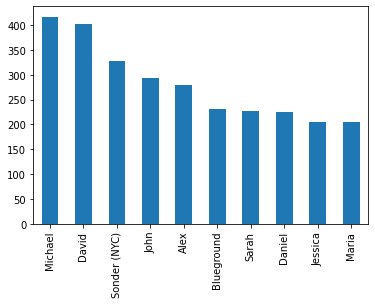

In [ ]:
busiest_host = df[['host_name']]['host_name'].value_counts()[0:10] #To count the number of host
busiest_host.plot(kind='bar')



*   From the dataset, it can be found that Michael is the busiest host



#5_To analyze the different types of room type available at neighbourhood group 

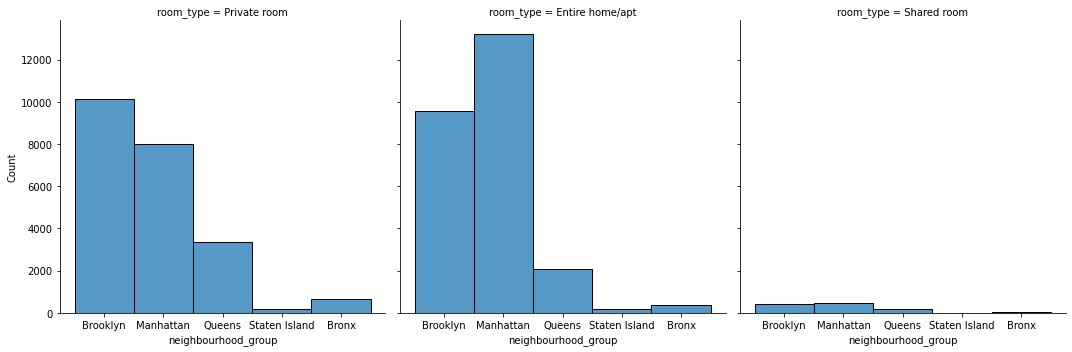

In [ ]:
room_types = df[['neighbourhood_group','room_type']]  # to filter the data for room type analysis
sns.displot(room_types,x='neighbourhood_group',col='room_type')

From the data, we can able to determine that
*   Private room - Brooklyn has more number of private room
*   Entire home/apt - Manhatten has more number of Entire home/apt
*   Shared room - comparatively all the neighbourhood group has less shared room.

# 6 To determine the average price of different types of rooms in each neighbourhood group

In [ ]:
price_roomtypes = df.groupby(['neighbourhood_group','room_type'])['price'].mean().round(2).unstack()
price_roomtypes

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


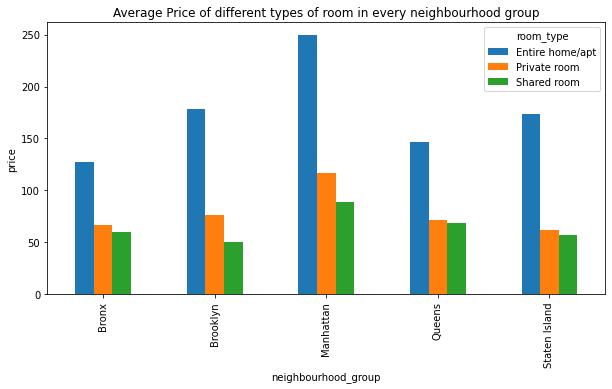

In [ ]:
price_roomtypes.plot(kind = 'bar',ylabel='price',title = 'Average Price of different types of room in every neighbourhood group',figsize=(10,5))



*   This data shows that , average price of all the room type is higher in manhattan city 
*   Entire home/apt is costlier compared with other room types in all neightbourhood group

# 7_To determine the average review count of different types of rooms in each neighbourhood group

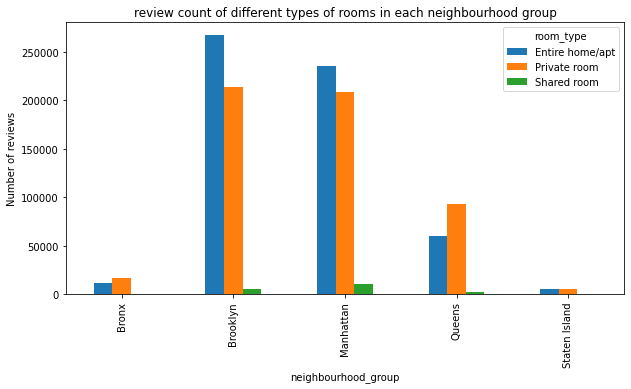

In [ ]:
review_roomtype = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()
review_roomtype.plot(kind='bar',title='review count of different types of rooms in each neighbourhood group',ylabel='Number of reviews',figsize=(10,5))

From the data, we can able to understand that
*   Brooklyn and Manhatten has the maximum number of reviews.
*   In brooklyn and Manhatten - Entire home'apt has more reviews
*   In queens and brons - private room has more reviews

[Text(0.5, 1.0, 'average review count of different types of rooms in each neighbourhood group')]

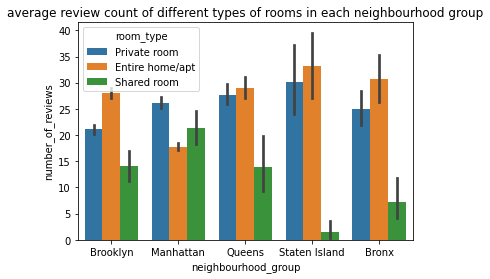

In [ ]:
review_roomtype = df[['neighbourhood_group','room_type','number_of_reviews']]

sns.barplot(data = review_roomtype,x='neighbourhood_group',y = review_roomtype['number_of_reviews'],hue='room_type').set(title='average review count of different types of rooms in each neighbourhood group')

# 8_To determine which neighbourhood has max reviews per month

In [ ]:
null_reviews = df_airbnb[df_airbnb['reviews_per_month'].isnull()]
null_reviews = null_reviews.groupby(['neighbourhood_group']).count()
null_reviews

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,,,,,,
Bronx,215,214,215,215,215,215,215,215,215,215,215,0,0,215,215
Brooklyn,3657,3653,3657,3654,3657,3657,3657,3657,3657,3657,3657,0,0,3657,3657
Manhattan,5029,5024,5029,5027,5029,5029,5029,5029,5029,5029,5029,0,0,5029,5029
Queens,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092,1092,0,0,1092,1092
Staten Island,59,59,59,59,59,59,59,59,59,59,59,0,0,59,59


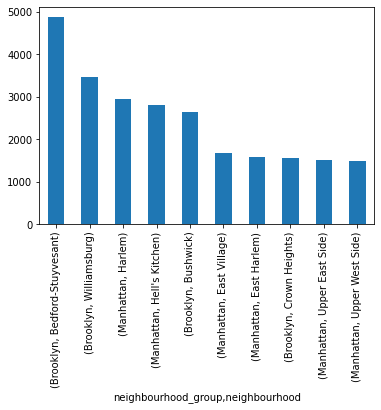

In [ ]:
max_reviews_per_month = df_airbnb.groupby(['neighbourhood_group','neighbourhood'])['reviews_per_month'].sum().sort_values(ascending=False)[0:10]
max_reviews_per_month
max_reviews_per_month.plot(kind='bar')

*   Brooklyn ,Bedford-Stuyvesant has maximum number of reviews per month

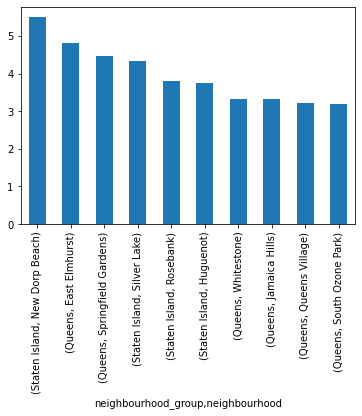

In [ ]:
avg_reviews_per_month = df_airbnb.groupby(['neighbourhood_group','neighbourhood'])['reviews_per_month'].mean().sort_values(ascending=False)[0:10]
avg_reviews_per_month.plot(kind='bar')


*   Staten Islan,New dorp beach has the highest average reviews per month


# 9_To analyze room availablity based on location of neighbourhood 

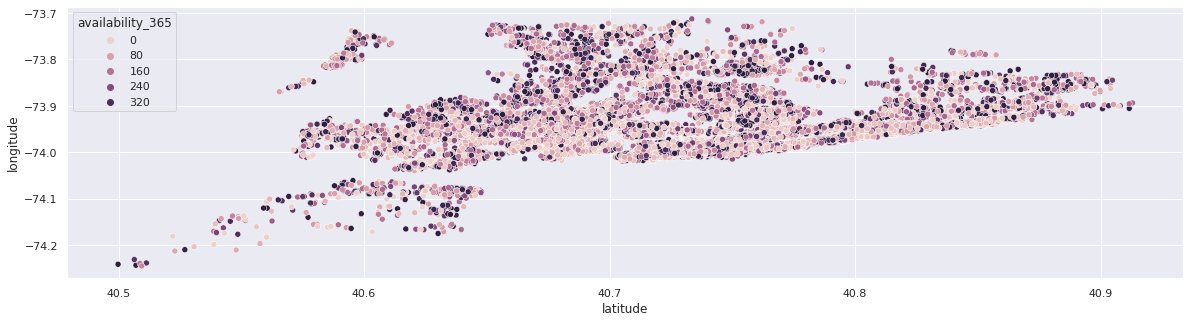

In [ ]:
availablity_location = df[['latitude','longitude','availability_365','price']]
sns.scatterplot(data = availablity_location,x = 'latitude' ,y = 'longitude',hue = 'availability_365')

*   This data shows that availablity of rooms is evenly distributed

# 10 To analyze the price based on the location of room

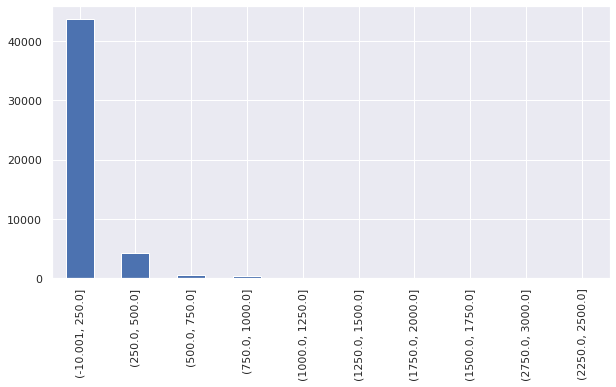

In [ ]:
price=df['price'].value_counts(bins=40).sort_values(ascending=False)[0:10]
price.plot(kind='bar',figsize=(10,5))

This data shows that most of the rooms are in the price range of 0-1000

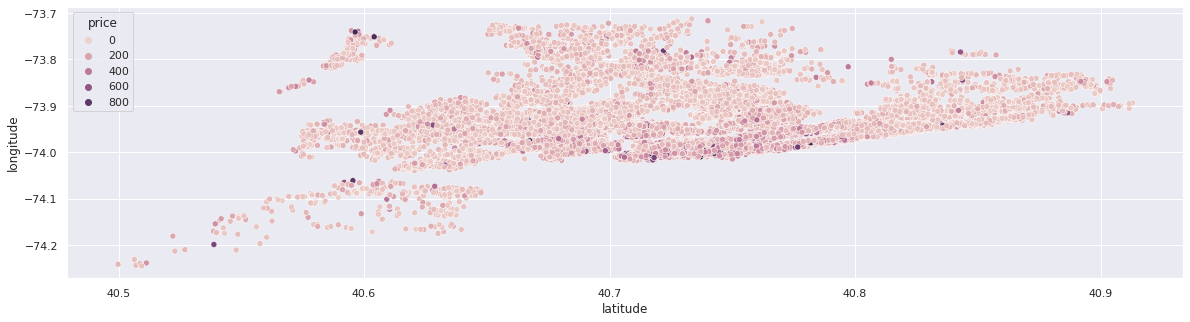

In [ ]:
price_location = df[['latitude','longitude','availability_365','price']]
price_location = price_location[price_location.price<1000]
sns.scatterplot(data = price_location,x = 'latitude' ,y = 'longitude',hue = 'price')

This data shows that price is varied depending upon the location